# Downloading the data

In [1]:
import pandas as pd
import numpy as np
import cryptocompare
import warnings
warnings.filterwarnings("ignore")

import time
from tqdm.autonotebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler


cryptas_minute = []
cryptas_hour = []
cryptas_day = []

#creating a class for dowloading data with different timeframes
class currency:
    name = ''
    mode = ''
    dataframe = None
    def __init__(self, name, mode):
        self.name = name
        self.mode = mode
        if mode == 'day':
            self.dataframe = pd.DataFrame(cryptocompare.get_historical_price_day(name, currency='USD', limit=60))
        elif mode == 'hour':
            self.dataframe = pd.DataFrame(cryptocompare.get_historical_price_hour(name, currency='USD', limit=168))
        else:
            self.dataframe = pd.DataFrame(cryptocompare.get_historical_price_minute(name, currency='USD', limit=1440))
            
        self.dataframe['time'] = pd.to_datetime(self.dataframe.time, unit='s')
        self.dataframe = self.dataframe.drop(['conversionType', 'conversionSymbol', 'open', 'high', 'low', 'volumeto', 'volumefrom'], axis = 1)
        
names = ['BTC', 'ETH', 'DOGE', 'LTC', 'LUNA', 'AVAX', 'BCH', 'ALGO', 'ADA', 'BNB', 'XRP', 'SOL', 'DOT', 'UNI', 'BUSD', 'USDC', 'LINK', 'ATOM', 'WBTC', 'ICP',
         'MATIC', 'FIL', 'XLM', 'TRX', 'FTT', 'ETC', 'VET', 'DAI', 'THETA', 'XTZ', 'EGLD', 'BTCB', 'CAKE', 'XMR', 'CRO', 'XYM', 'NEAR', 'EOS', 'QNT', 'AXS',
         'AXS', 'AAVE', 'HBAR', 'MIOTA', 'GRT', 'FTM', 'NEO', 'SHIB', 'KSM', 'LEO', 'KLAY', 'BSV', 'UST', 'WAVES', 'MKR', 'CELO', 'BTT', 'AMP', 'COMP', 'HT',
         'RUNE', 'DASH', 'HNT', 'AR', 'CHZ', 'STX', 'REV', 'ONE', 'DCR', 'ZEC', 'XDC', 'TFUEL', 'HOT', 'XEM', 'TUSD', 'MANA', 'SNX', 'OMG', 'SUSHI', 'ENJ',
         'CEL', 'FLOW', 'IOST', 'YGG', 'CRV', 'YFI', 'ICX', 'ZIL', 'QTUM', 'BAT', 'RVN', 'OKB', 'BTG', 'MDX', 'USDP', 'TEL', 'AUDIO', 'PERP', 'ZEN', 'KCS',
         'REN', 'BNT', 'NEXO', 'CELR', 'ZRX', 'TWT', 'SC', 'ONT', 'DGB', 'VGX', 'RENBTC', 'NANO', 'ANKR', 'CHSB', 'SAND', 'UMA', 'FET', 'LRC', 'IOTX', 'KAVA',
         'USDN', '1INCH', 'GLM', 'ERG', 'HUSD', 'UBT', 'COTI', 'RSR', 'OCEAN', 'NMR', 'SXP', 'XDB', 'WAXP', 'SRM', 'ETN', 'ELF', 'DENT', 'SKL', 'LSK', 'GNO',
         'VLX', 'XYO', 'CKB', 'ANC', 'POLY', 'ALPHA', 'LPT', 'XCH', 'GT', 'STORJ', 'DAG', 'CVC', 'XVG', 'VTHO', 'BEST', 'WRX', 'WIN', 'BCD', 'BAKE', 'INJ',
         'PAXG', 'CTC', 'OGN', 'SNT', 'STMX', 'STRAX', 'ONG', 'XVS', 'XWC', 'ROSE', 'PROM', 'REEF', 'BAND', 'RLC', 'EWT', 'DFI', 'MLN', 'ORBS', 'ALICE', 'CTSI',
         'HIVE', 'REP', 'OXT', 'ARK', 'DERO', 'PHA', 'NKN', 'FUN', 'CSPR', 'MAID', 'REQ', 'STEEM', 'ANT', 'MTL', 'NU', 'TOMO', 'TITAN', 'TRAC', 'NOIA', 'BADGER']


for i in names:
    cryptas_minute.append(currency(i, 'minute')) 
    cryptas_hour.append(currency(i, 'hour')) 
    cryptas_day.append(currency(i, 'day')) 
    
#for i in cryptas_minute:
#    print(i.name, i.mode, '\n', i.dataframe)
    
for i in cryptas_hour:
    print(i.name, i.mode, '\n', i.dataframe)
    
#for i in cryptas_day:
#    print(i.name, i.mode, '\n', i.dataframe)

BTC hour 
                    time     close
0   2021-10-11 14:00:00  57456.09
1   2021-10-11 15:00:00  57490.71
2   2021-10-11 16:00:00  57302.83
3   2021-10-11 17:00:00  57421.32
4   2021-10-11 18:00:00  57361.36
..                  ...       ...
164 2021-10-18 10:00:00  61310.05
165 2021-10-18 11:00:00  60904.66
166 2021-10-18 12:00:00  60626.26
167 2021-10-18 13:00:00  61839.70
168 2021-10-18 14:00:00  61963.11

[169 rows x 2 columns]
ETH hour 
                    time    close
0   2021-10-11 14:00:00  3597.75
1   2021-10-11 15:00:00  3594.81
2   2021-10-11 16:00:00  3577.71
3   2021-10-11 17:00:00  3564.58
4   2021-10-11 18:00:00  3553.15
..                  ...      ...
164 2021-10-18 10:00:00  3786.14
165 2021-10-18 11:00:00  3741.55
166 2021-10-18 12:00:00  3728.25
167 2021-10-18 13:00:00  3802.89
168 2021-10-18 14:00:00  3794.69

[169 rows x 2 columns]
DOGE hour 
                    time   close
0   2021-10-11 14:00:00  0.2363
1   2021-10-11 15:00:00  0.2340
2   2021-10-11 16:

# Merging the data

In [2]:
# since not to overload the computer, we will use hourly data only (you can remove '#' if you want to use a different timeframe) 

def merge(crypto_df):
    element_1 = crypto_df[0]
    for i in range(1, len(crypto_df)):
        suffix = crypto_df[i-1].name if (i==1) else ''
        element_1.dataframe = element_1.dataframe.merge(crypto_df[i].dataframe, how='inner', on = 'time', suffixes=(suffix, crypto_df[i].name))
    return element_1

#minute_df = merge(cryptas_minute).dataframe
#minute_df.to_csv('minute.csv')

hour_df = merge(cryptas_hour).dataframe
hour_df.to_csv('hour.csv') #writing the resulting table into csv file

#day_df = merge(cryptas_day).dataframe
#day_df.to_csv('day.csv')

# Data preprocessing

In [3]:
#if you wanna use different timeframe use 'minute_df' or 'day_df' instead of 'hour_df'
hour_df = pd.read_csv('hour.csv', index_col=0) #you can skip this step and just use previously uploaded hour_df data
hour_df

time  closeBTC  closeETH   close  closeLTC  closeLUNA  \
0    2021-10-11 14:00:00  57456.09   3597.75  0.2363    183.15      39.16   
1    2021-10-11 15:00:00  57490.71   3594.81  0.2340    182.47      38.90   
2    2021-10-11 16:00:00  57302.83   3577.71  0.2330    181.59      38.71   
3    2021-10-11 17:00:00  57421.32   3564.58  0.2321    180.21      38.38   
4    2021-10-11 18:00:00  57361.36   3553.15  0.2299    179.28      38.32   
..                   ...       ...       ...     ...       ...        ...   
164  2021-10-18 10:00:00  61310.05   3786.14  0.2625    182.23      35.95   
165  2021-10-18 11:00:00  60904.66   3741.55  0.2584    180.82      35.60   
166  2021-10-18 12:00:00  60626.26   3728.25  0.2568    180.73      35.94   
167  2021-10-18 13:00:00  61839.70   3802.89  0.2571    184.43      36.26   
168  2021-10-18 14:00:00  61963.11   3794.69  0.2547    183.65      35.94   

     closeAVAX  closeBCH  closeALGO  closeADA  ...  closeREQ  closeSTEEM  \
0        56.94    614.38      1.774     2.209  ...    0.1862      0.6109   
1        56.52    612.66      1.759     2.202  ...    0.1857      0.6136   
2        56.29    611.62      1.765     2.192  ...    0.1911      0.6121   
3        55.52    605.58      1.755     2.186  ...    0.1915      0.6167   
4        55.08    601.99      1.740     2.180  ...    0.1905      0.6108   
..         ...       ...        ...       ...  ...       ...         ...   
164      55.15    609.29      1.753     2.141  ...    0.2467      0.5490   
165      54.67    606.19      1.739     2.129  ...    0.2455      0.5463   
166      54.79    603.43      1.739     2.122  ...    0.2396      0.5454   
167      55.25    611.89      1.754     2.145  ...    0.2388      0.5522   
168      54.93    610.36      1.745     2.138  ...    0.2389      0.5506   

     closeANT  closeMTL  closeNU  closeTOMO  closeTITAN  closeTRAC  closeNOIA  \
0       4.621     3.509   0.2808      2.197       4.720     0.5555     0.3671   
1       4.623     3.500   0.2806      2.190       4.671     0.6179     0.3668   
2       4.594     3.488   0.2786      2.191       4.622     0.5914     0.3667   
3       4.633     3.472   0.3000      2.180       4.616     0.5817     0.3675   
4       4.572     3.466   0.2979      2.170       4.566     0.6047     0.3671   
..        ...       ...      ...        ...         ...        ...        ...   
164     4.693     3.075   1.2750      2.281       4.733     0.6031     0.3200   
165     4.656     3.040   1.2700      2.264       5.081     0.6011     0.3149   
166     4.663     3.042   1.3600      2.257       4.787     0.5978     0.3183   
167     4.695     3.078   1.3350      2.289       4.814     0.6091     0.3265   
168     4.660     3.077   1.3080      2.275       4.755     0.6032     0.3210   

     closeBADGER  
0          31.01  
1          31.88  
2          30.61  
3          31.63  
4          31.06  
..           ...  
164        29.42  
165        28.70  
166        28.44  
167        28.85  
168        28.49  

[169 rows x 201 columns]

In [4]:
hour_df = hour_df.set_index('time')
hour_df = hour_df.rename(columns = {'close':'closeDOGE'}) #there was an issue with DOGE ticker
hour_df = hour_df.rename(columns=lambda x: x.strip('close')) #get rid of close string
hour_df = hour_df.T
hour_df

time    2021-10-11 14:00:00  2021-10-11 15:00:00  2021-10-11 16:00:00  \
BTC              57456.0900           57490.7100           57302.8300   
ETH               3597.7500            3594.8100            3577.7100   
DOGE                 0.2363               0.2340               0.2330   
LTC                183.1500             182.4700             181.5900   
LUNA                39.1600              38.9000              38.7100   
...                     ...                  ...                  ...   
TOMO                 2.1970               2.1900               2.1910   
TITAN                4.7200               4.6710               4.6220   
TRAC                 0.5555               0.6179               0.5914   
NOIA                 0.3671               0.3668               0.3667   
BADGER              31.0100              31.8800              30.6100   

time    2021-10-11 17:00:00  2021-10-11 18:00:00  2021-10-11 19:00:00  \
BTC              57421.3200           57361.3600           57500.7300   
ETH               3564.5800            3553.1500            3516.2200   
DOGE                 0.2321               0.2299               0.2278   
LTC                180.2100             179.2800             177.6300   
LUNA                38.3800              38.3200              37.8500   
...                     ...                  ...                  ...   
TOMO                 2.1800               2.1700               2.1420   
TITAN                4.6160               4.5660               4.5920   
TRAC                 0.5817               0.6047               0.5964   
NOIA                 0.3675               0.3671               0.3686   
BADGER              31.6300              31.0600              32.9100   

time    2021-10-11 20:00:00  2021-10-11 21:00:00  2021-10-11 22:00:00  \
BTC              57323.3200           57155.2800           57187.8600   
ETH               3491.4800            3517.7900            3512.9500   
DOGE                 0.2269               0.2289               0.2306   
LTC                175.6700             176.7000             178.3500   
LUNA                38.3300              38.7000              38.9000   
...                     ...                  ...                  ...   
TOMO                 2.1140               2.1410               2.1580   
TITAN                4.6260               4.8090               4.7250   
TRAC                 0.5743               0.5727               0.5705   
NOIA                 0.3680               0.3675               0.3757   
BADGER              33.2400              33.1600              31.7300   

time    2021-10-11 23:00:00  ...  2021-10-18 05:00:00  2021-10-18 06:00:00  \
BTC              57498.8000  ...           62367.0100           62251.1900   
ETH               3544.1400  ...            3875.1200            3861.0000   
DOGE                 0.2313  ...               0.2398               0.2404   
LTC                179.2900  ...             186.7000             186.1600   
LUNA                39.1700  ...              36.7200              36.9500   
...                     ...  ...                  ...                  ...   
TOMO                 2.1700  ...               2.2980               2.3040   
TITAN                4.5970  ...               4.6270               4.6250   
TRAC                 0.5780  ...               0.6146               0.6150   
NOIA                 0.3795  ...               0.3218               0.3212   
BADGER              32.0000  ...              29.4300              29.6900   

time    2021-10-18 07:00:00  2021-10-18 08:00:00  2021-10-18 09:00:00  \
BTC              61891.8400           61790.3000           61222.6200   
ETH               3837.0300            3822.0800            3797.9900   
DOGE                 0.2409               0.2498               0.2634   
LTC                185.0800             184.4400             182.8100   
LUNA                36.6700              36.5300              35.93

In [5]:
hour_df = hour_df.reset_index()
hour_df = hour_df.rename(columns = {'index':'ticker'}) #renaming index column for convinience
hour_df.isnull().sum(axis=1) #looking for missing or null data

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Length: 200, dtype: int64

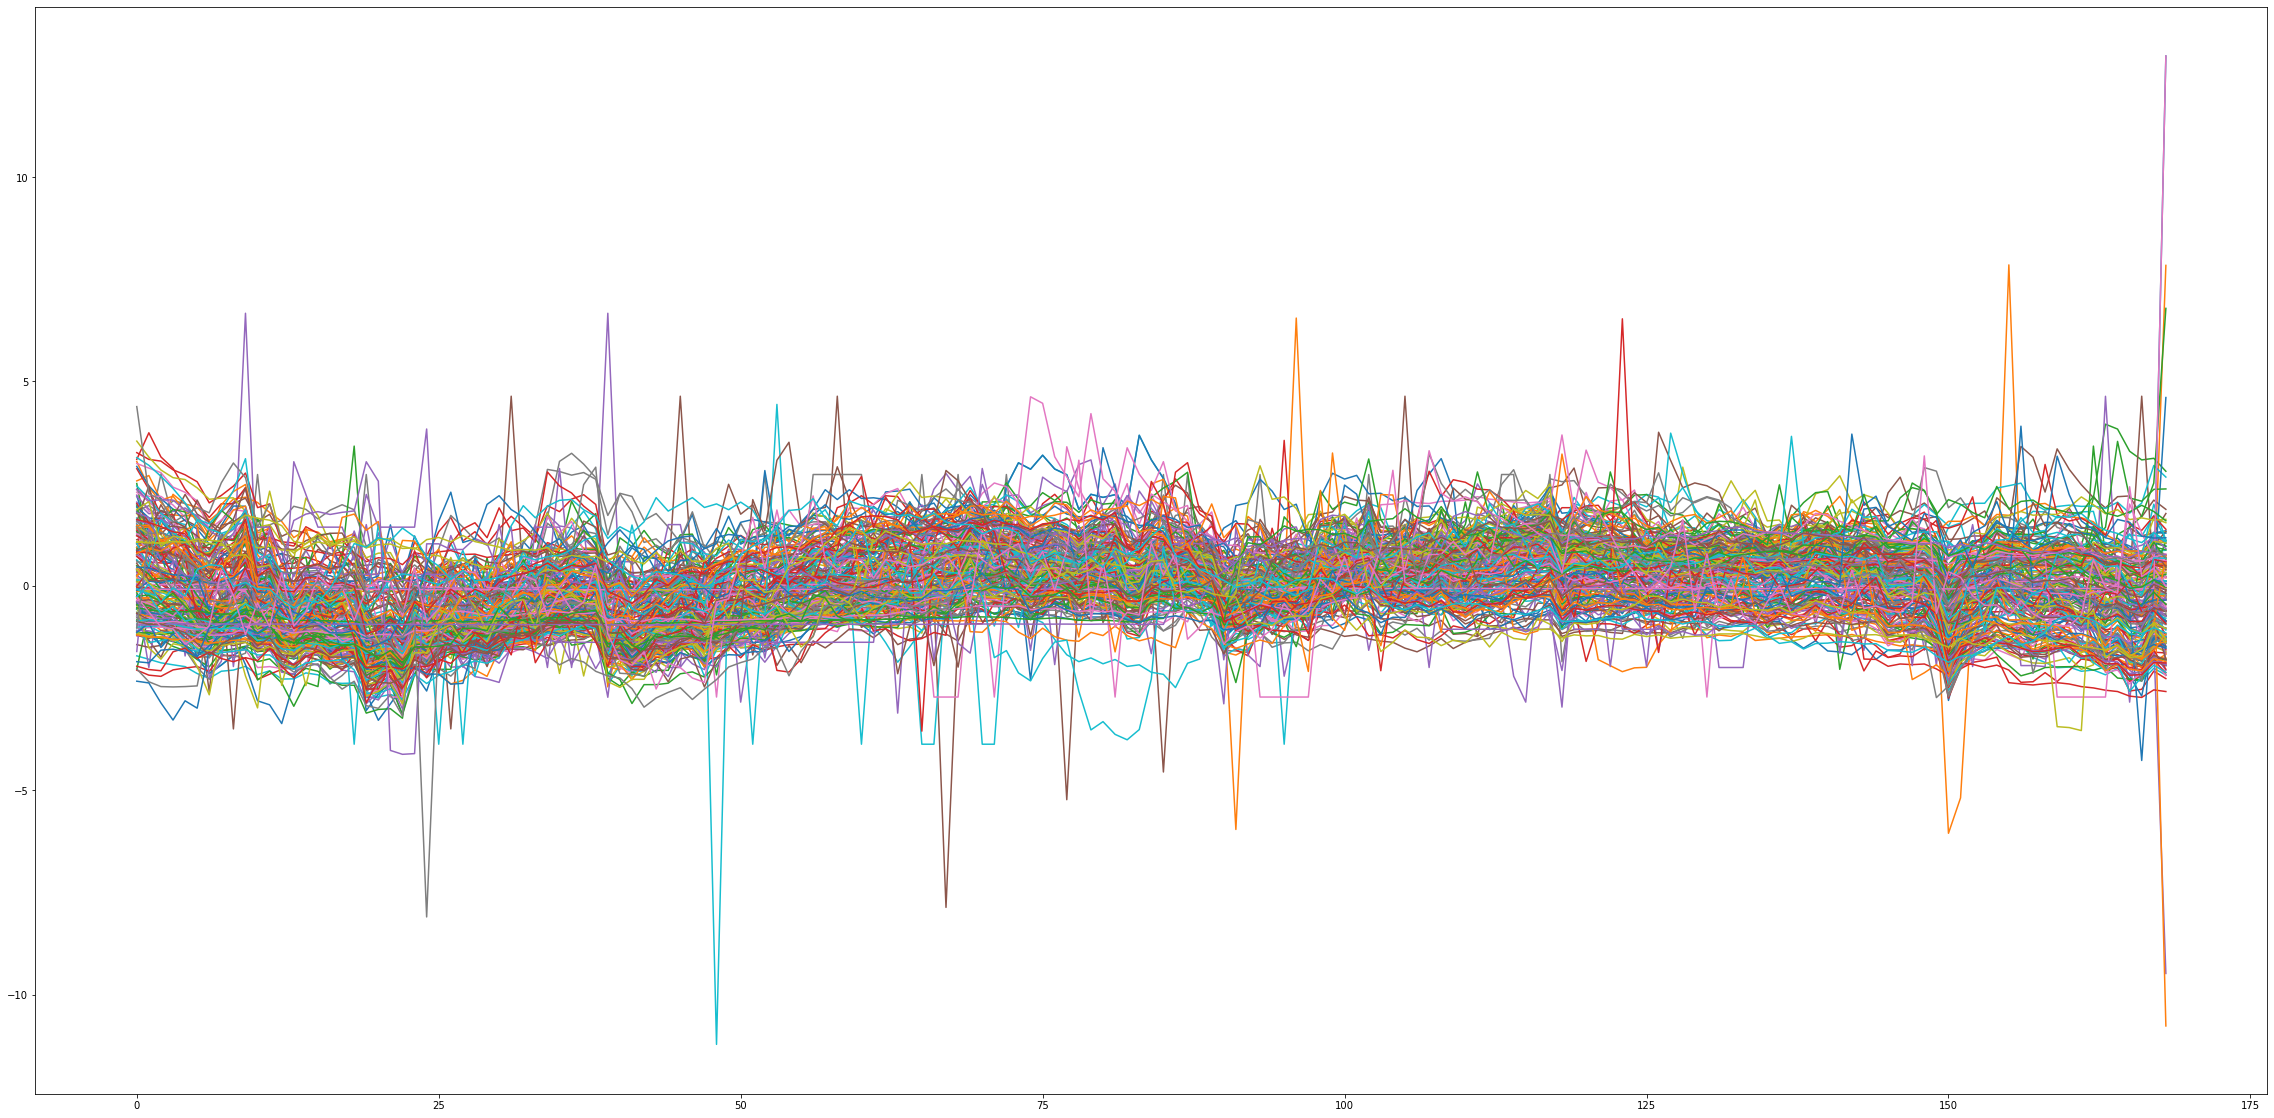

In [6]:
#standardizing our data for the correct operation of algorithms
scaler = StandardScaler()
tickers_scaled = scaler.fit_transform(hour_df.iloc[:, 1:].T).T

#plotting our scaled data
plt.figure(figsize=(40, 20))
plt.plot(tickers_scaled.T)

# Basic KMeans

  0%|          | 0/8 [00:00<?, ?it/s]

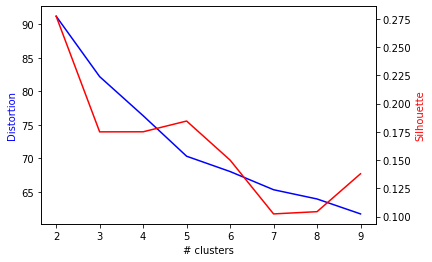

In [7]:
#calculate and draw distortions (elbow rule) and silhouette score (the bigger - the better)

distortions = []
silhouette = []
K = range(2, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="euclidean", n_jobs=6, max_iter=10, n_init=5)
    kmeanModel.fit(tickers_scaled)
    distortions.append(kmeanModel.inertia_)
    silhouette.append(silhouette_score(tickers_scaled, kmeanModel.labels_, metric="euclidean"))

    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(K, distortions, 'b-')
ax2.plot(K, silhouette, 'r-')

ax1.set_xlabel('# clusters')
ax1.set_ylabel('Distortion', color='b')
ax2.set_ylabel('Silhouette', color='r')

plt.show()

In [8]:
n_clusters = 5 #this number is relevant on October 18, 2020
ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", n_jobs=6, max_iter=10)
ts_kmeans.fit(tickers_scaled)

TimeSeriesKMeans(max_iter=10, n_clusters=5, n_jobs=6)

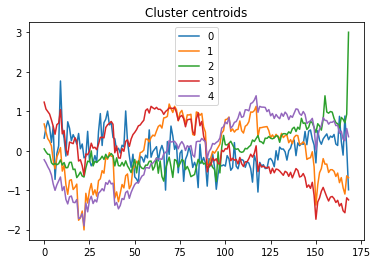

In [9]:
#plotting cluster centroids
for cluster_number in range(n_clusters):
    plt.plot(ts_kmeans.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids")
plt.legend()
plt.show()

In [10]:
#adding cluster column in our table (it will show the predicted cluster for each crypto)
hour_df['cluster'] = ts_kmeans.predict(tickers_scaled)

In [11]:
#drawing graphs of each crypto 
def plot_cluster_tickers(current_cluster):
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0]/4)),
        4,
        figsize=(15, 3*int(np.ceil(current_cluster.shape[0]/4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)

    for index, (_, row) in enumerate(current_cluster.iterrows()):
        ax[index].plot(row.iloc[5:-1])
        ax[index].set_title(f"{row.ticker}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

                          Cluster number: 0


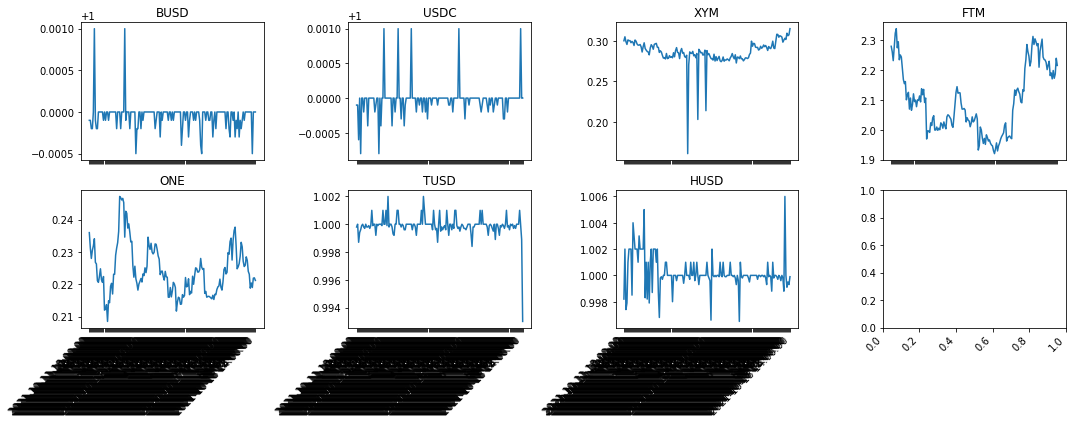

                          Cluster number: 1


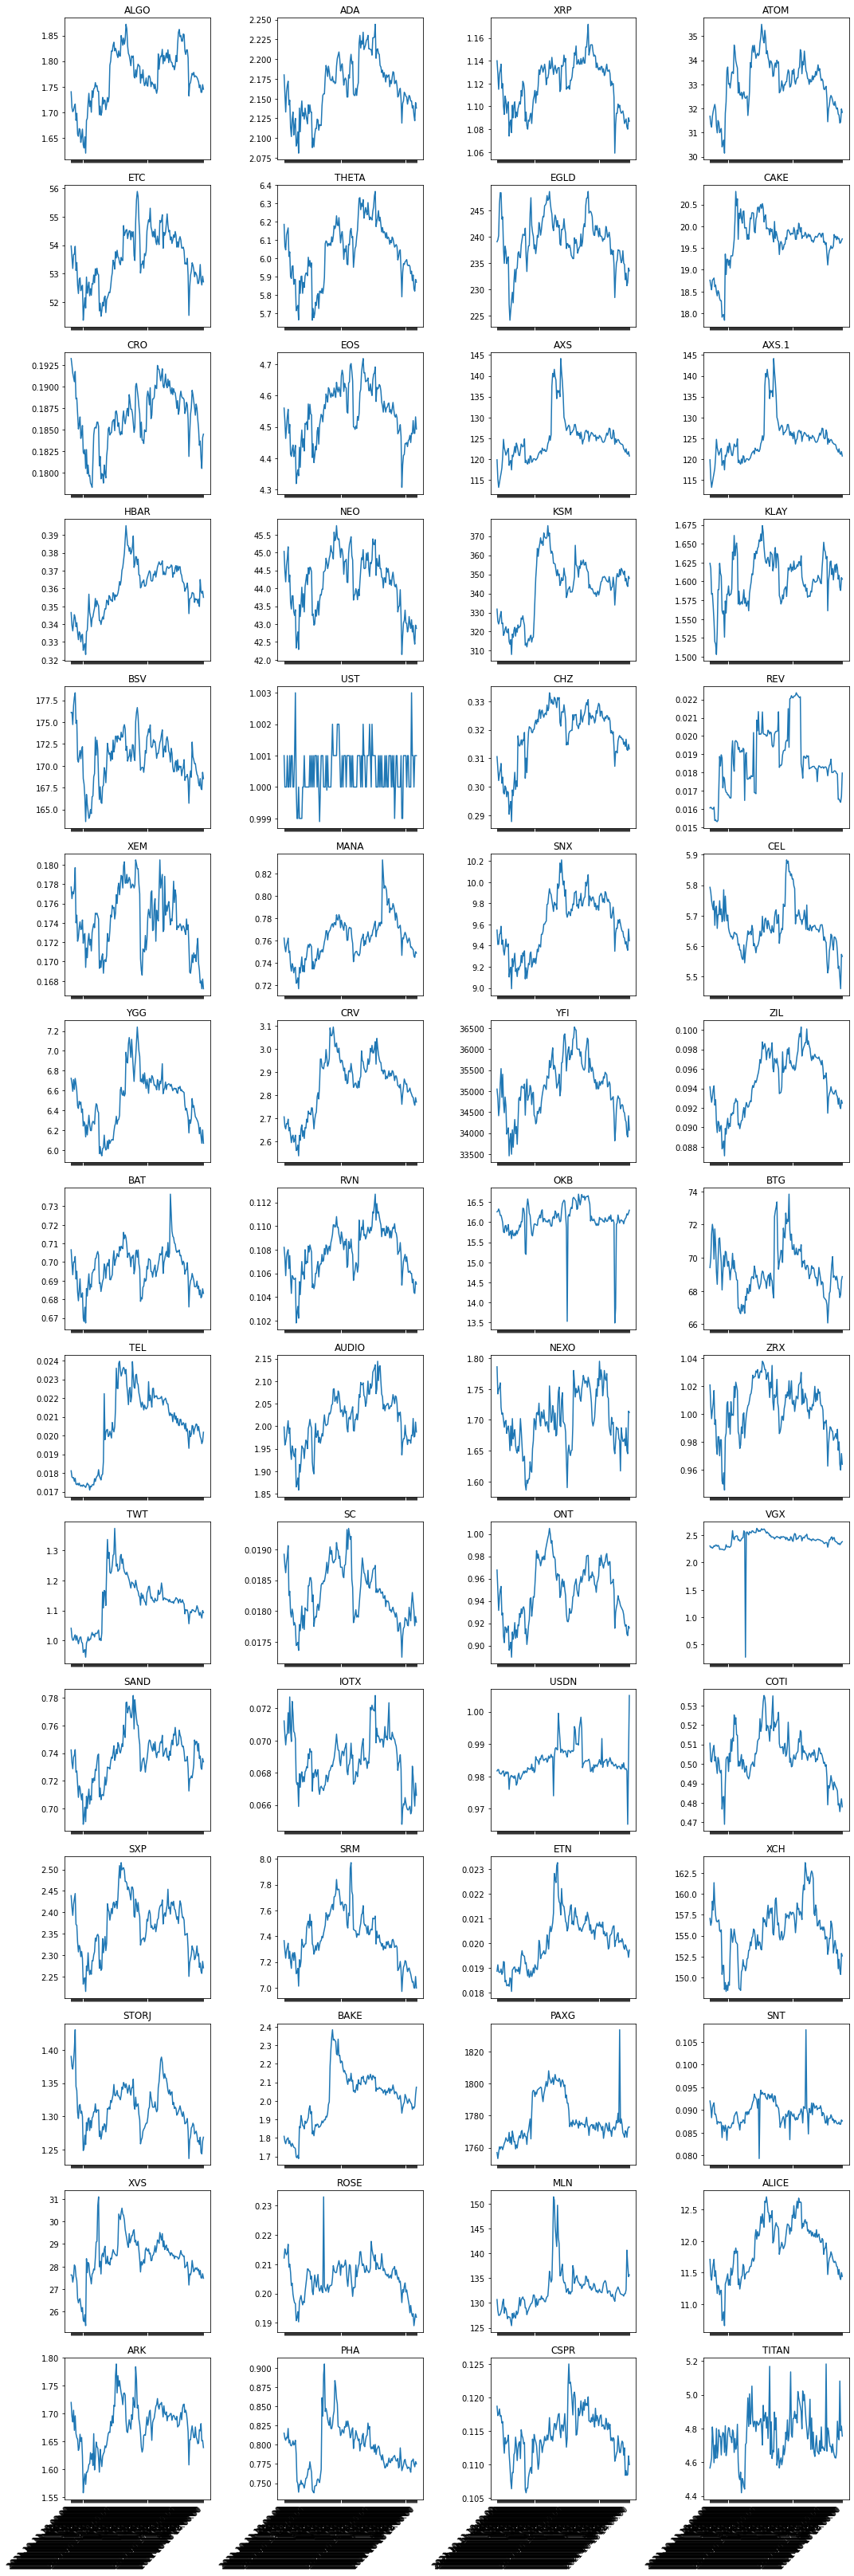

                          Cluster number: 2


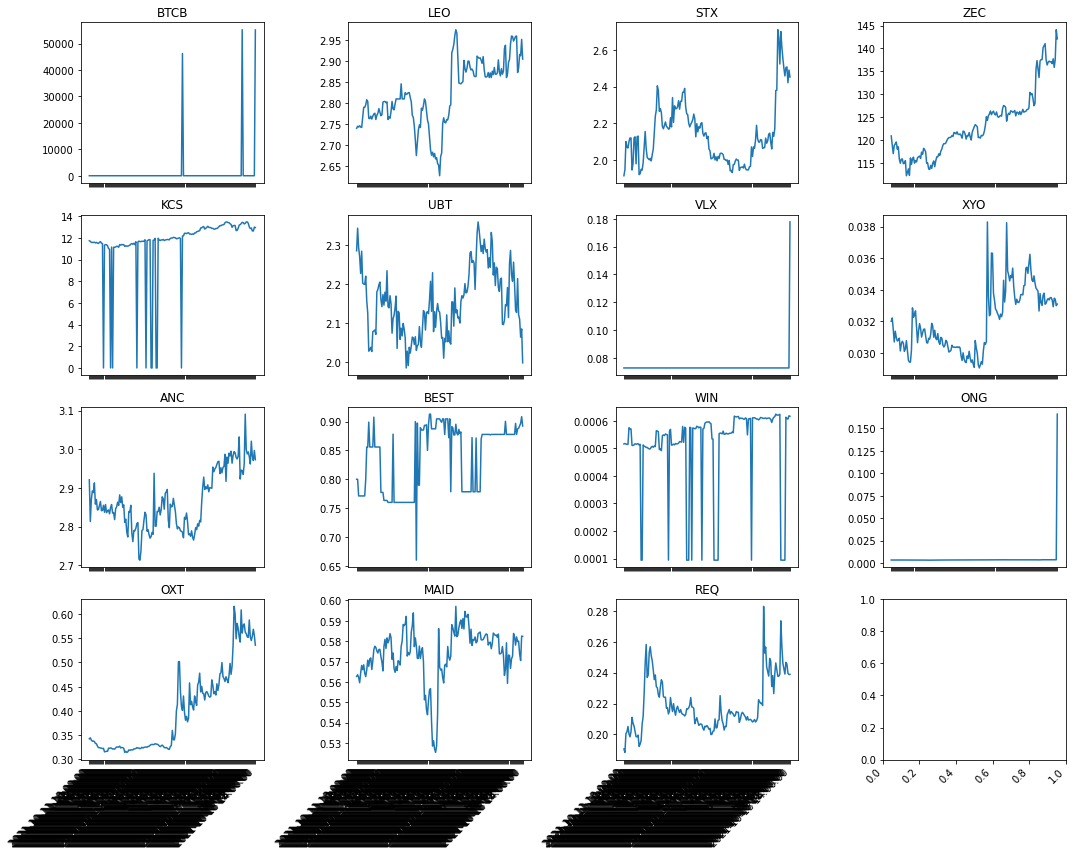

                          Cluster number: 3


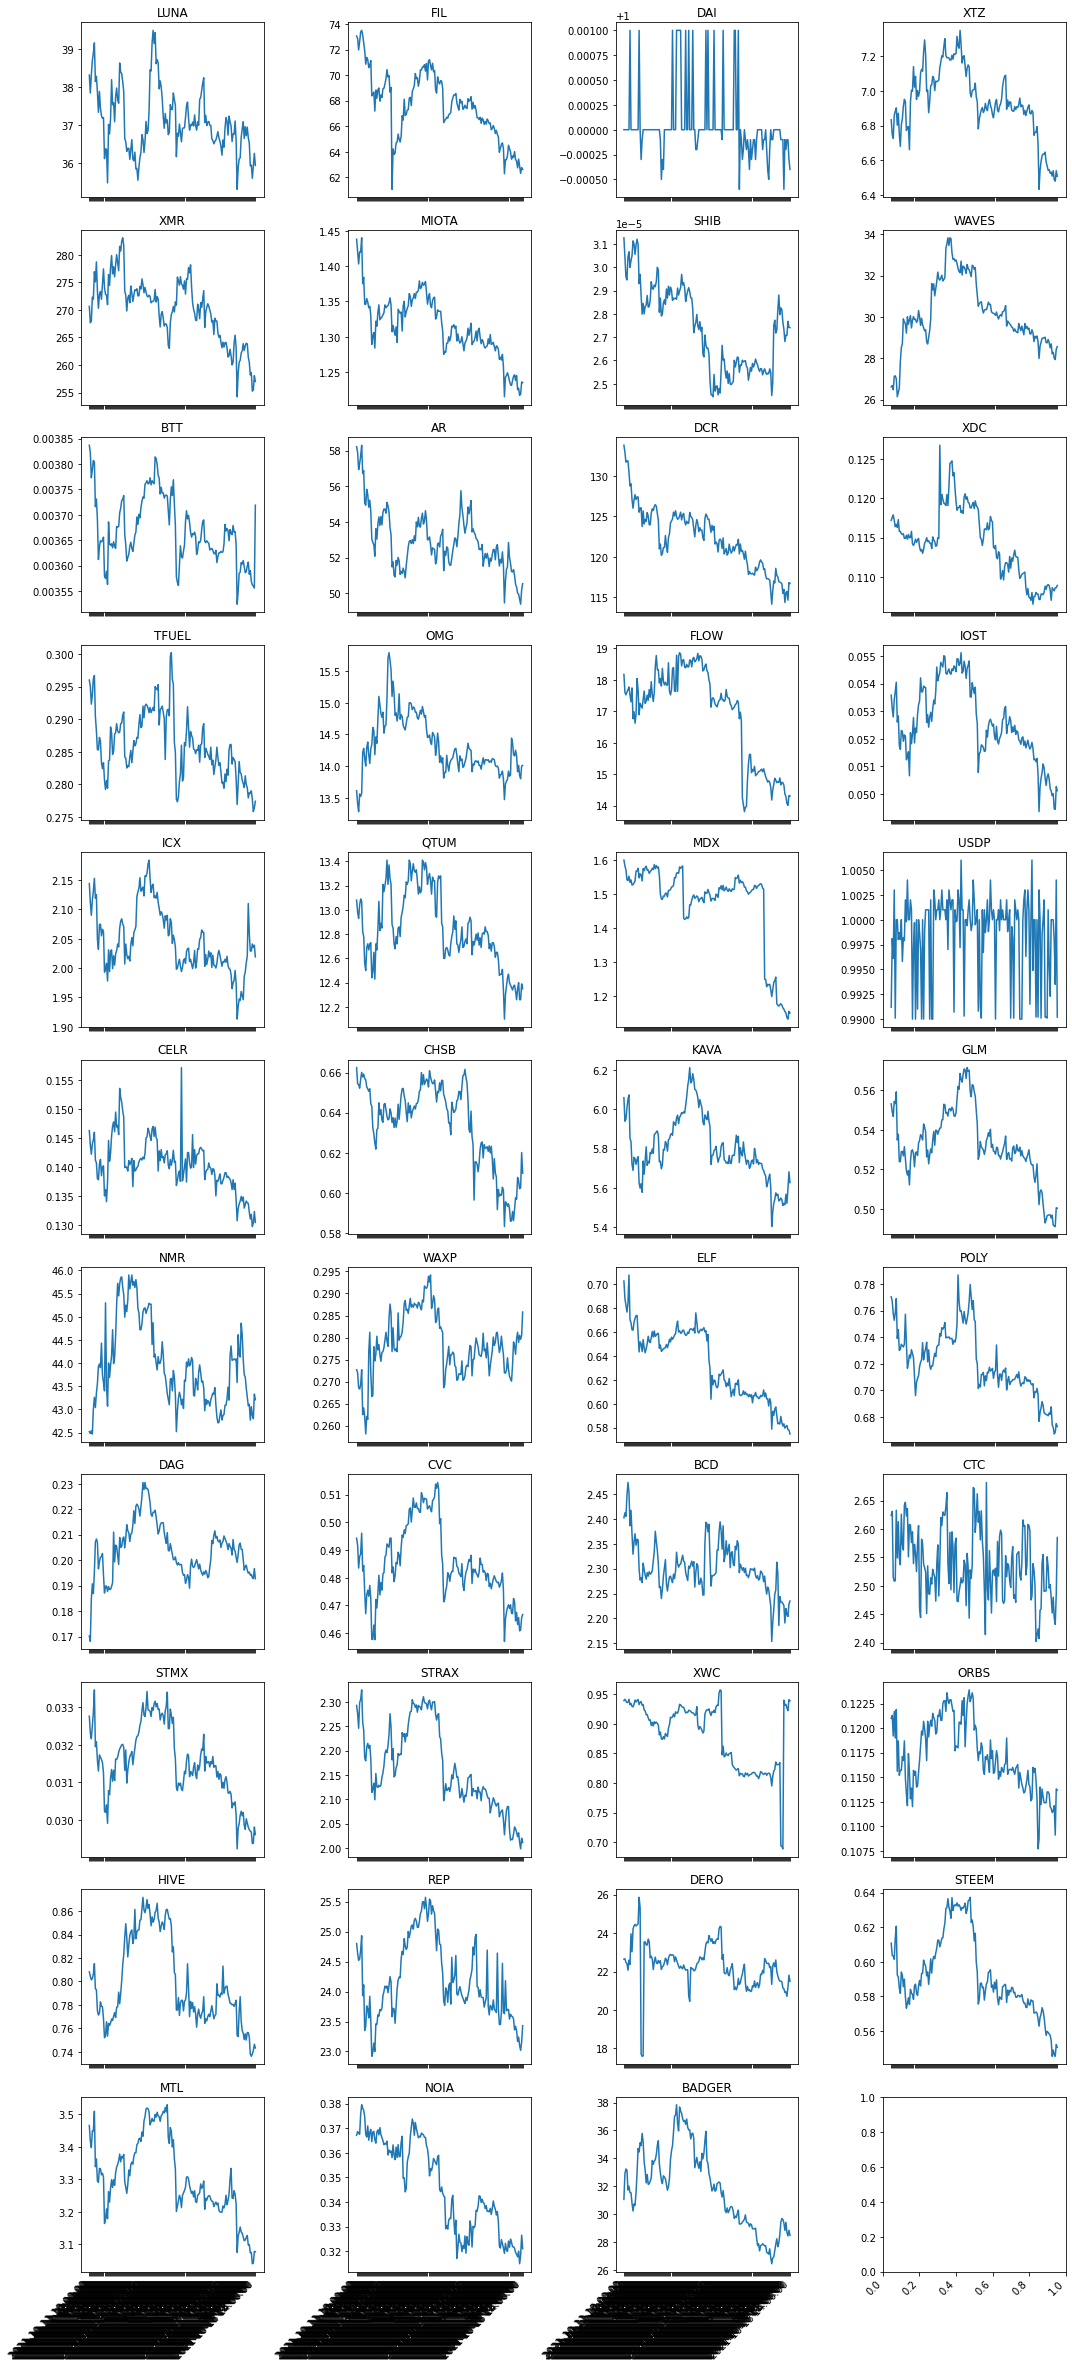

                          Cluster number: 4


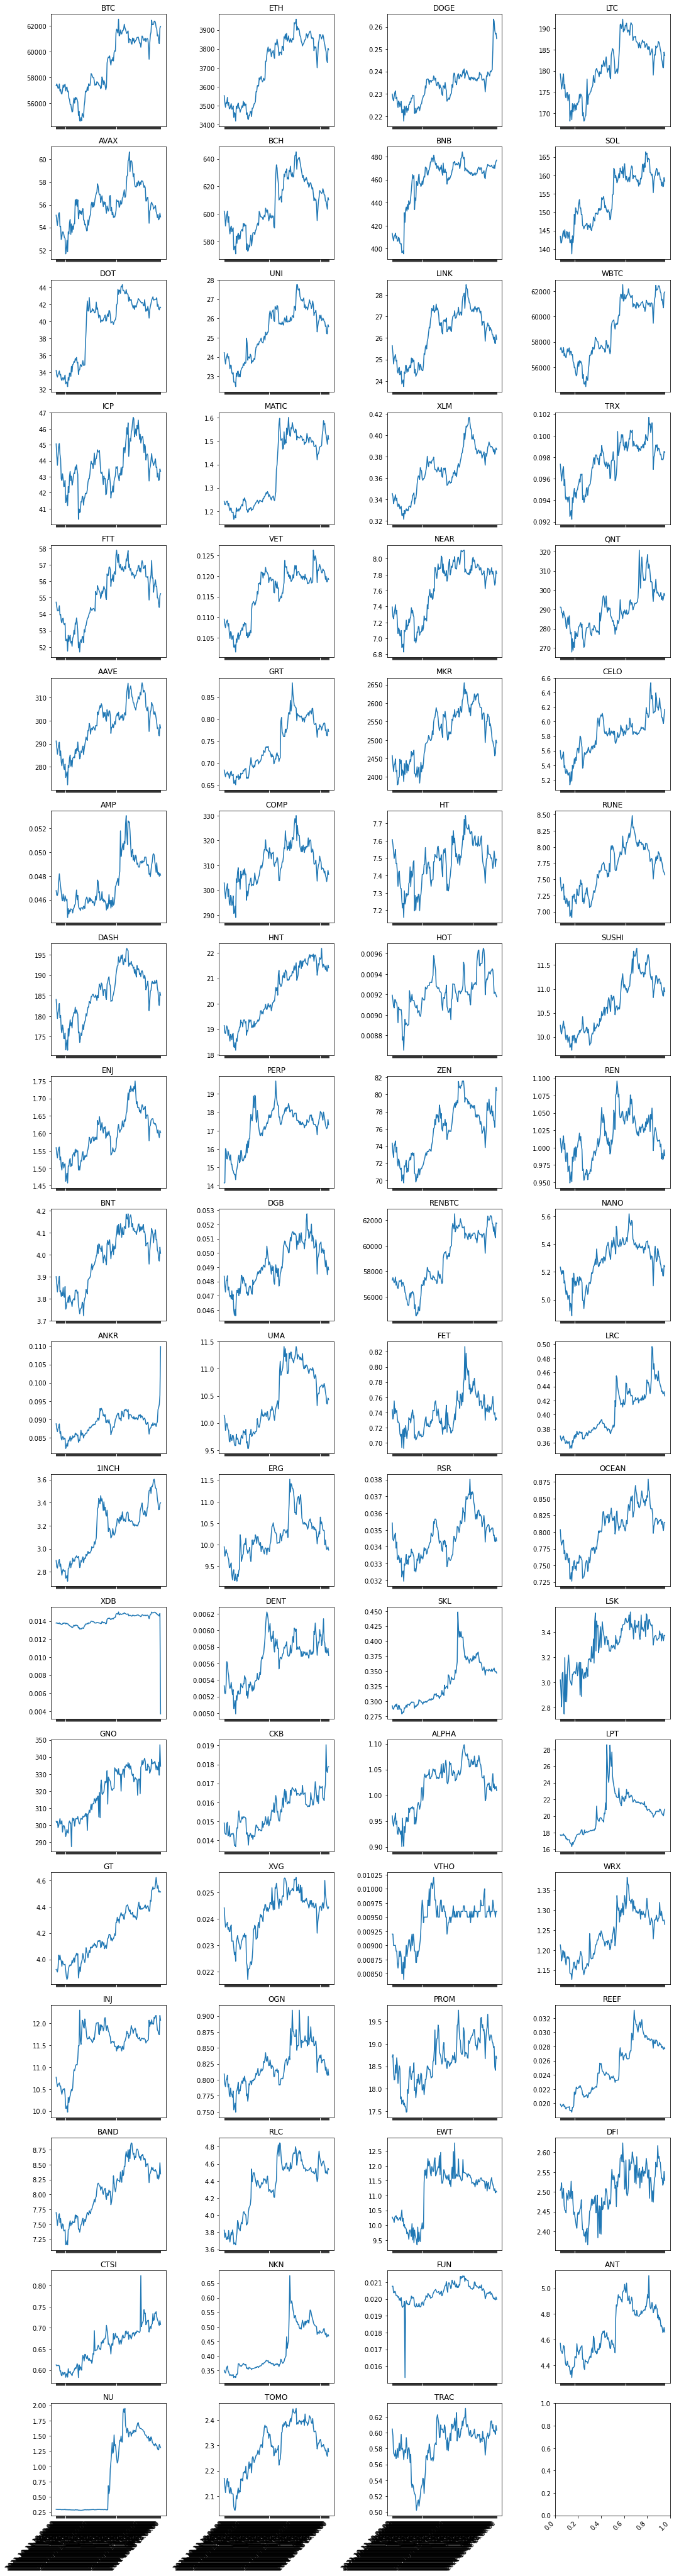

In [12]:
#crypto graphs grouped by clusters
for cluster in range(n_clusters):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(hour_df[hour_df.cluster==cluster])

In [13]:
# writing results into csv_file
conclusion_kmeans = pd.DataFrame(hour_df.groupby('cluster')['ticker'].value_counts())
conclusion_kmeans.to_csv('hour_conclusion_kmeans.csv')

# DTW (Dynamic Time Warping)

  0%|          | 0/8 [00:00<?, ?it/s]

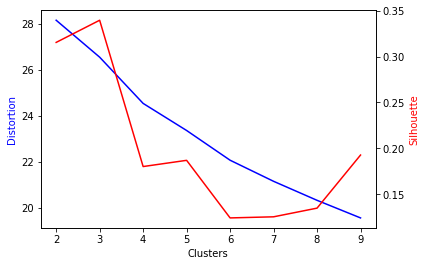

In [14]:
#nearly the same procedure as before (except metric)

distortions = []
silhouette = []
K = range(2, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="dtw", n_jobs=6, max_iter=10, n_init=5)
    kmeanModel.fit(tickers_scaled)
    distortions.append(kmeanModel.inertia_)
    silhouette.append(silhouette_score(tickers_scaled, kmeanModel.labels_, metric="dtw"))

    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(K, distortions, 'b-')
ax2.plot(K, silhouette, 'r-')

ax1.set_xlabel('Сlusters')
ax1.set_ylabel('Distortion', color='b')
ax2.set_ylabel('Silhouette', color='r')

plt.show()

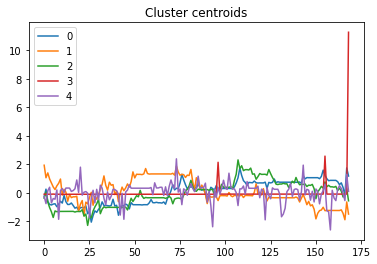

In [19]:
n_clusters = 5 #this number is relevant on October 10, 2020
ts_kmeans_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", n_jobs=6, max_iter=10)
ts_kmeans_dtw.fit(tickers_scaled)

for cluster_number in range(n_clusters):
    plt.plot(ts_kmeans_dtw.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids")
plt.legend()
plt.show()

In [20]:
hour_df['cluster'] = ts_kmeans_dtw.predict(tickers_scaled)

                          Cluster number: 0


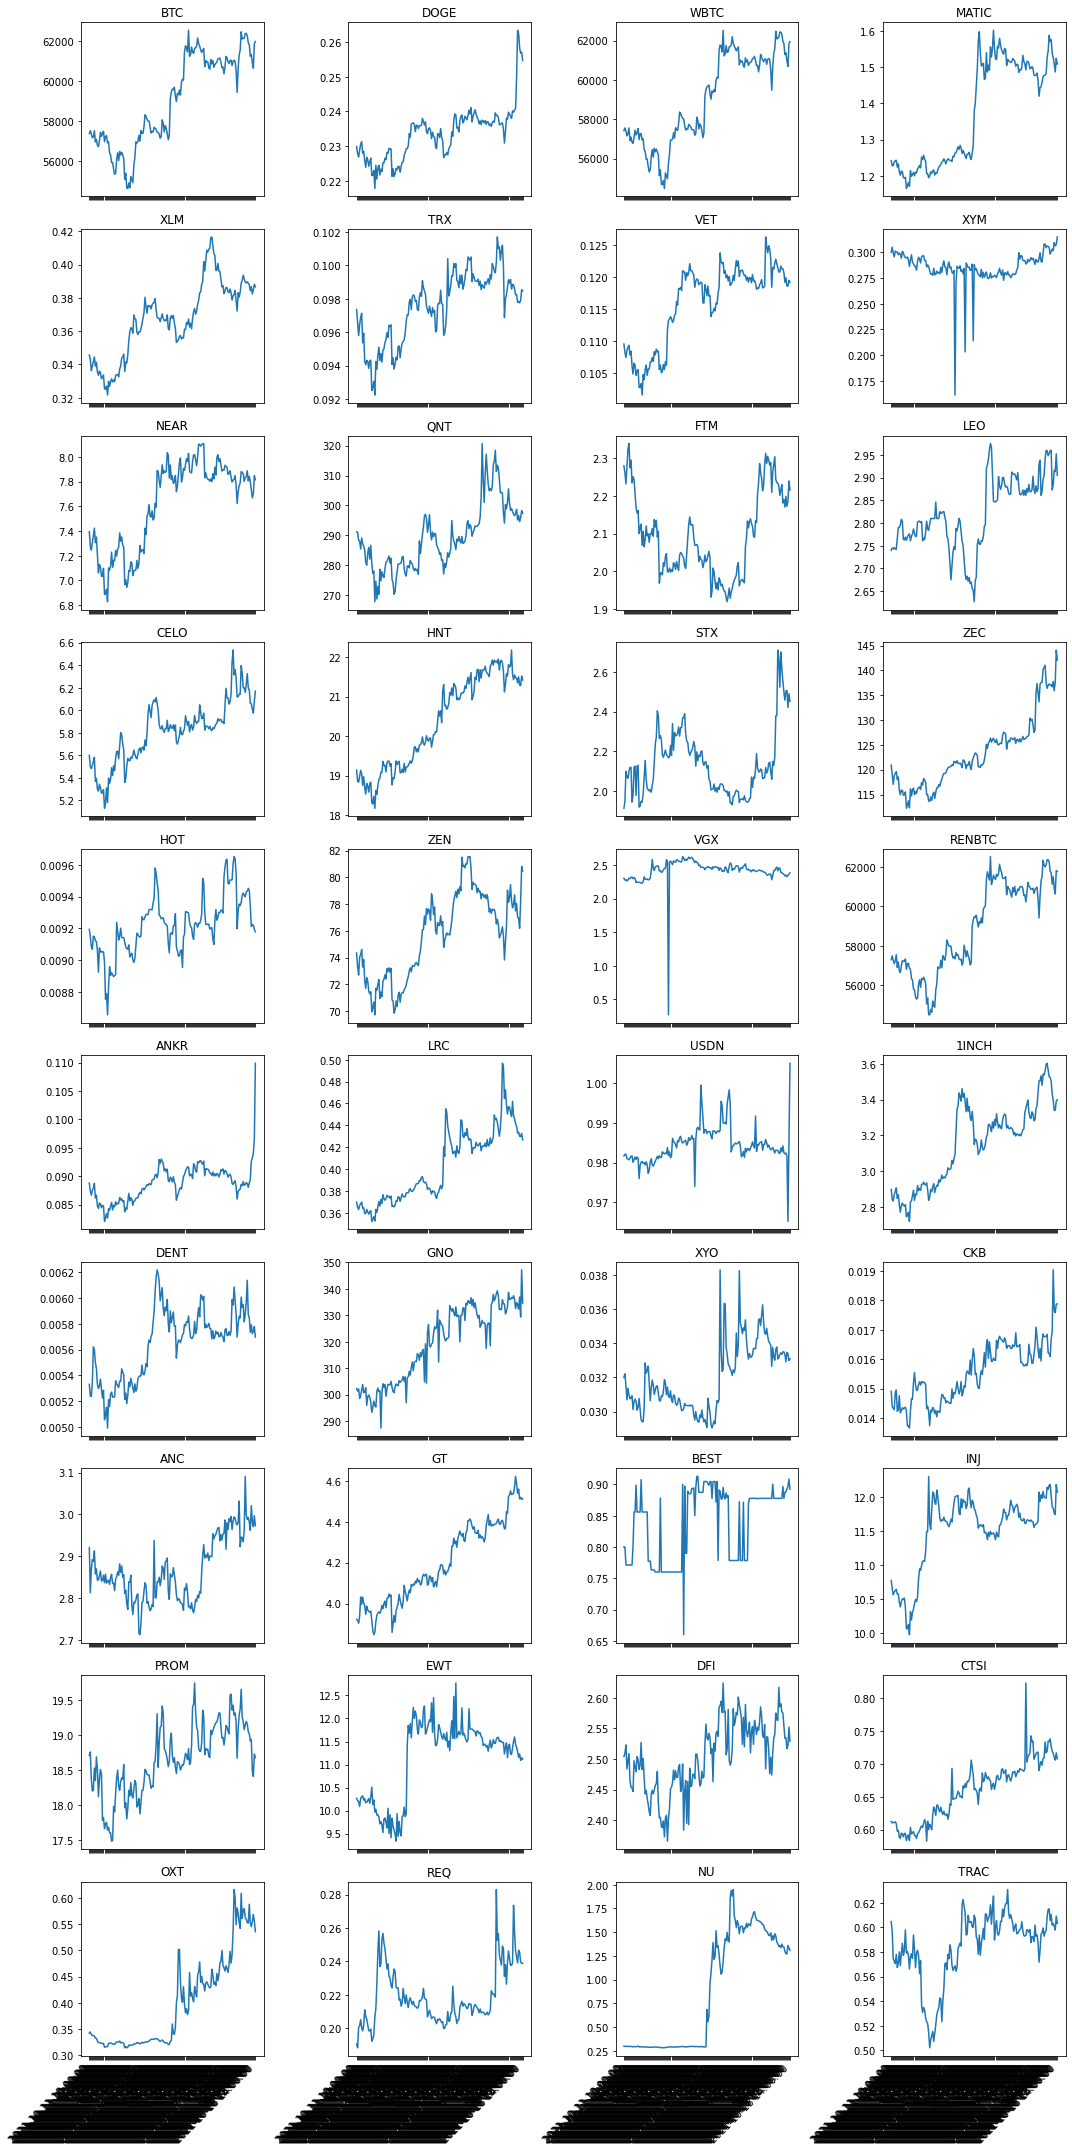

                          Cluster number: 1


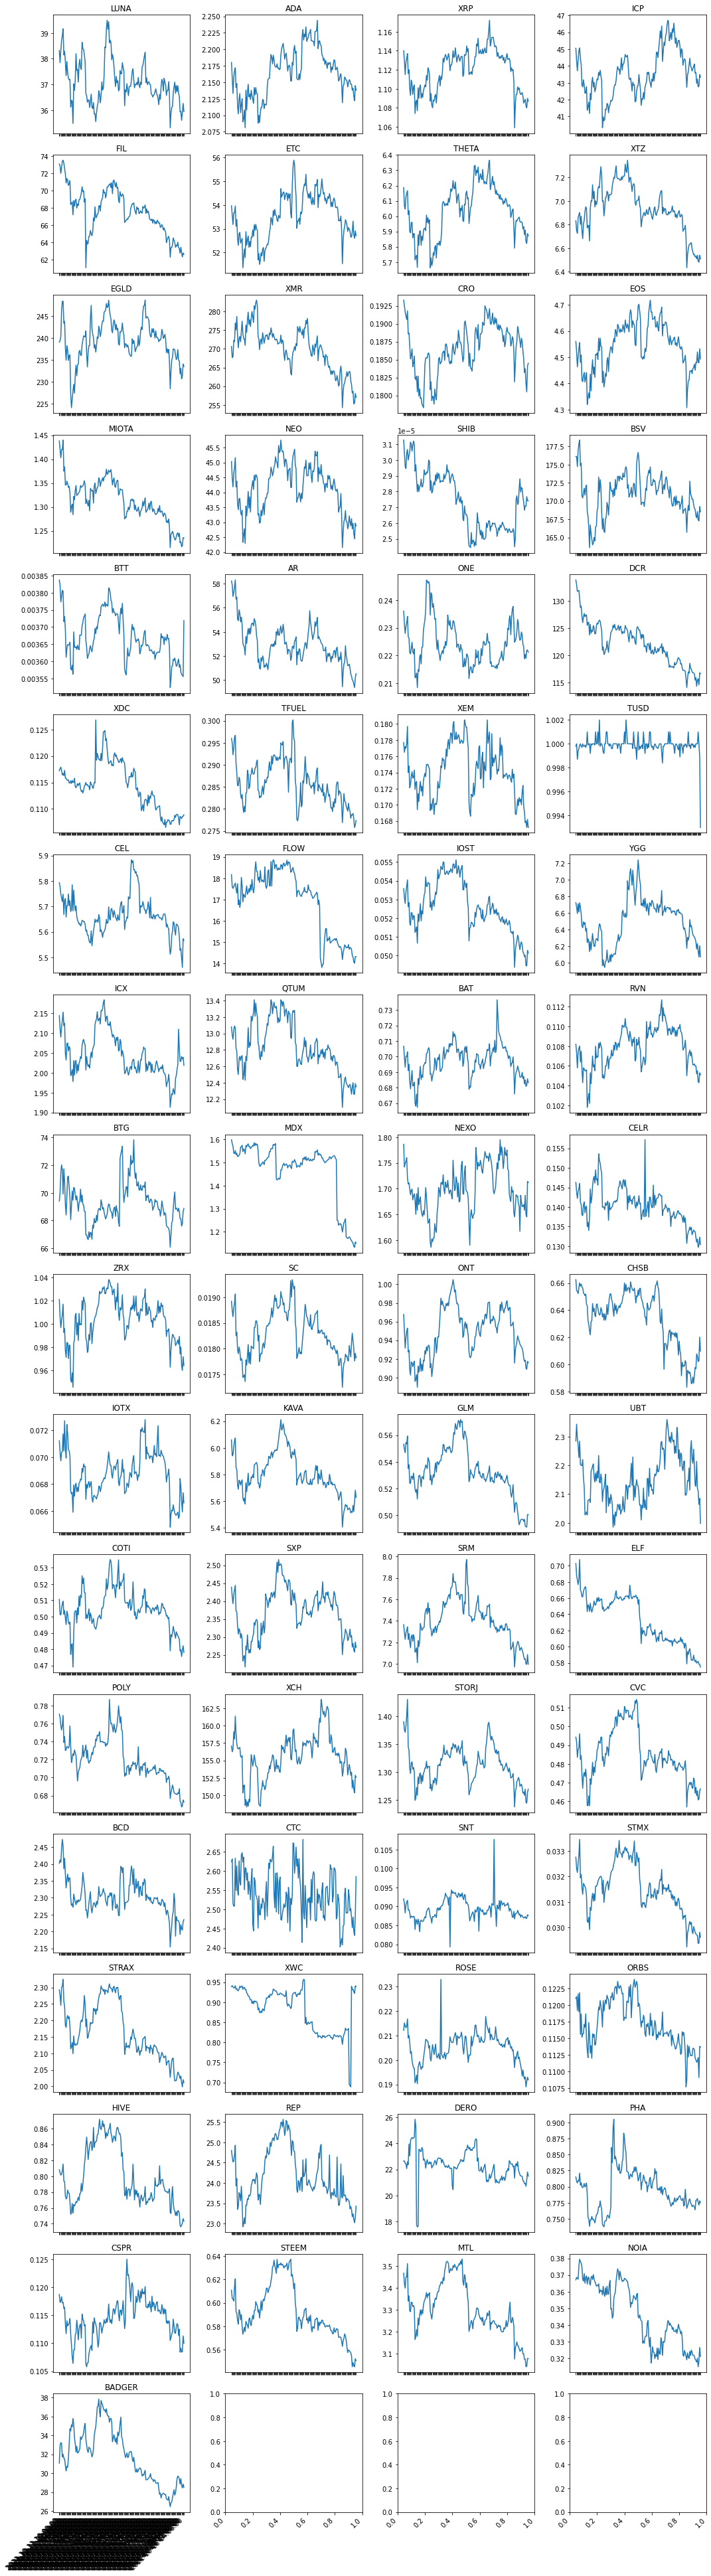

                          Cluster number: 2


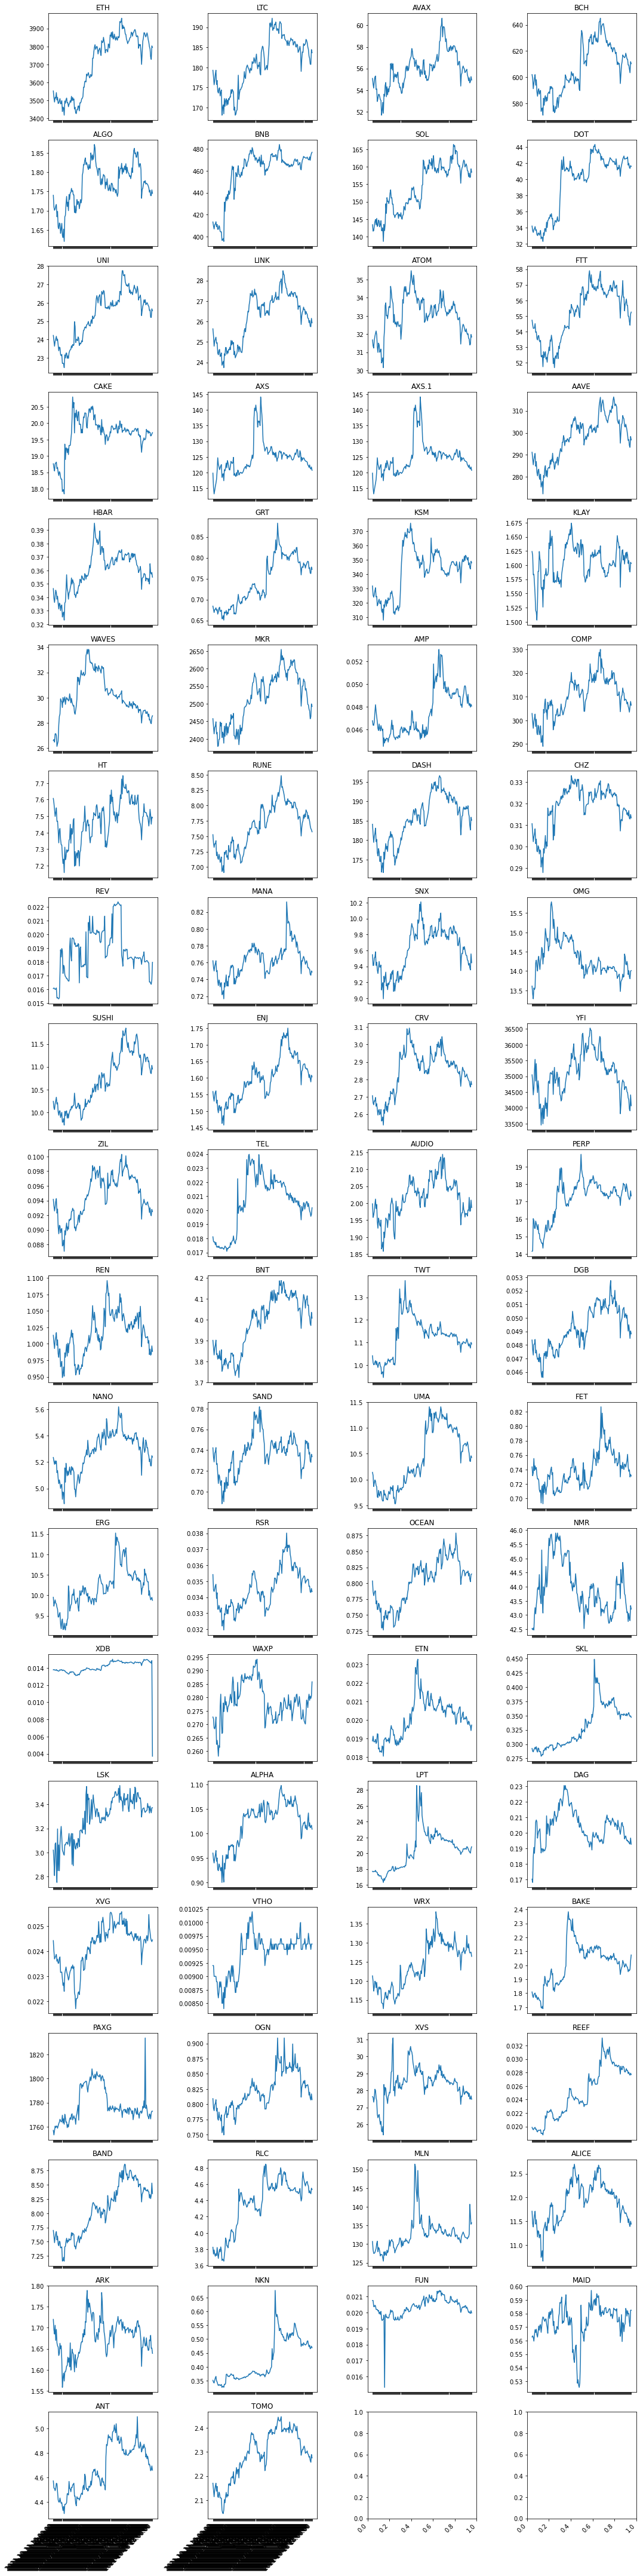

                          Cluster number: 3


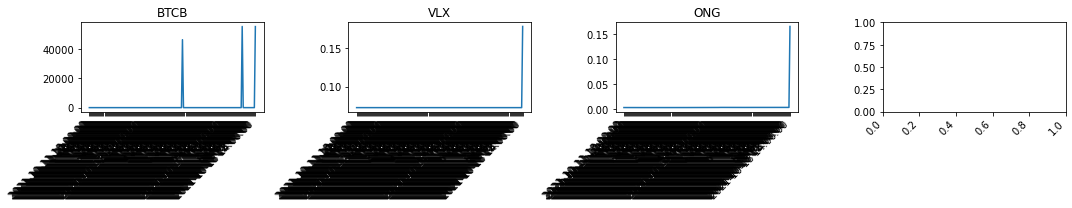

                          Cluster number: 4


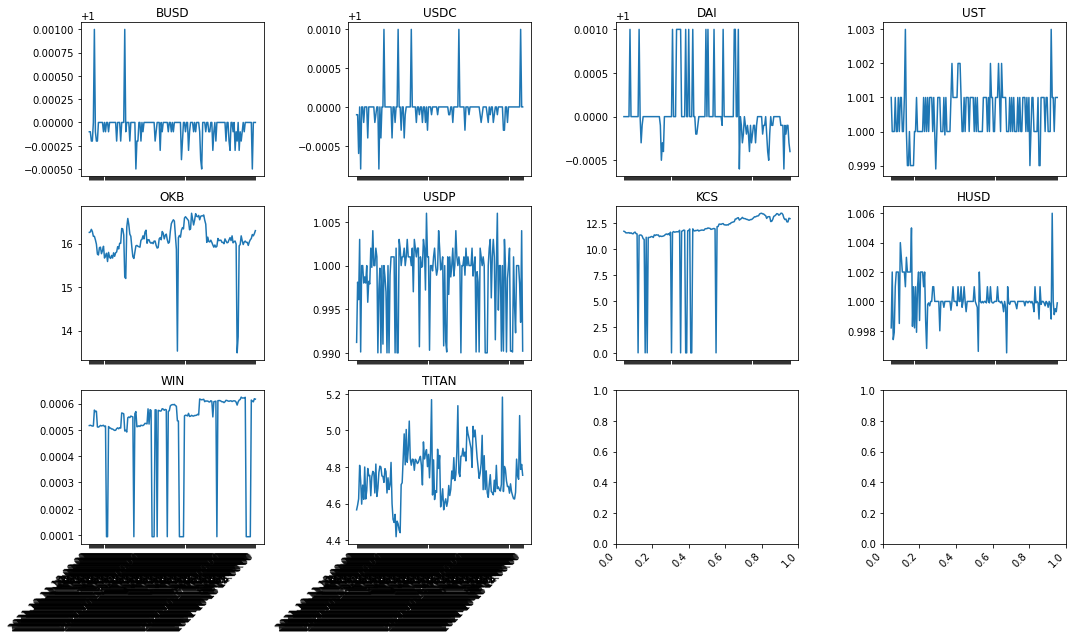

In [21]:
for cluster in range(n_clusters):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(hour_df[hour_df.cluster==cluster])

In [22]:
# writing results into csv_file
conclusion_dtw = pd.DataFrame(hour_df.groupby('cluster')['ticker'].value_counts())
conclusion_dtw.to_csv('hour_conclusion_dtw.csv')